In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [153]:
length = 2

def speed(t):   
    v = length/t
    return v

def density(n):
    rho = n/length
    return rho

def average(n, v):
    if n != 0:
        avg = np.sum(v)/n
    else:
        avg = 0
        
    return avg

def padder(arr, size):
    size_to_pad = size - len(arr)
    
    padded = np.pad(arr, (0, size_to_pad), constant_values=0)
    
    return padded

def scatter(x, y, name):
    plt.scatter(x, y)
    
    title = "FD without"
    count = 0
    
    stripped = name.replace("results", '')
    
    if "a" in stripped:
        title = title + " alignment"
        count +=1
    if "c" in stripped:
        title = title + " cohesion"
        count +=1
    if "s" in stripped:
        title = title + " separation"
        count +=1
    
    if count == 0:
        title = "Standard FD"
        
    plt.xlim([-0.1, max(x)+ 0.5])
    plt.ylim([-0.1, 1.7])
    plt.title("Restults from " + title)
    plt.xlabel(f"Density (Boids/$m^{2}$)")
    plt.ylabel(f"Speed (m/s)")
    plt.show()

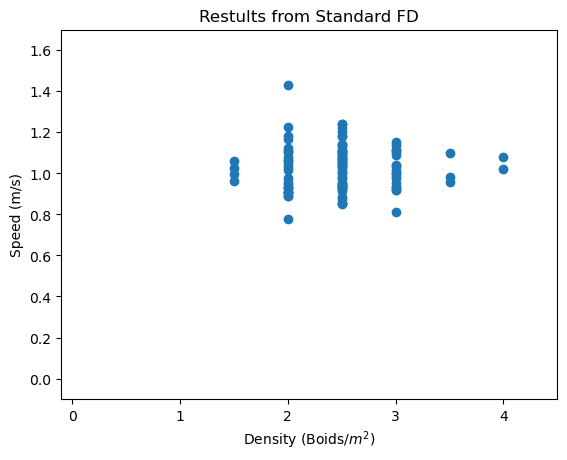

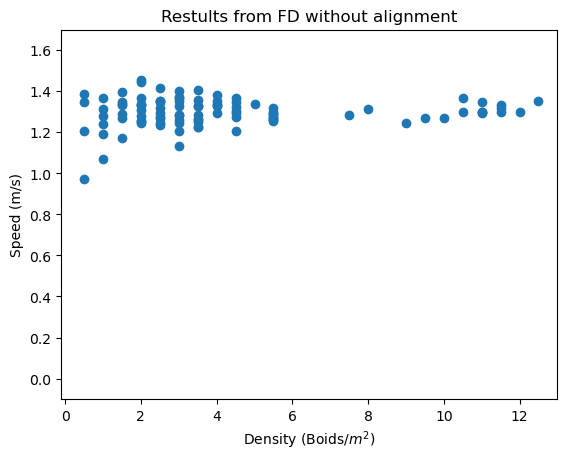

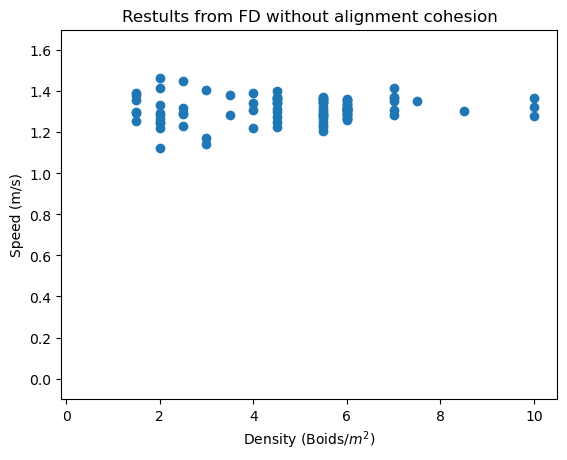

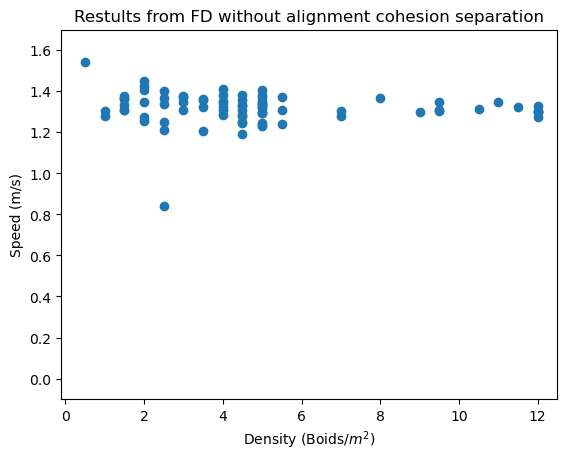

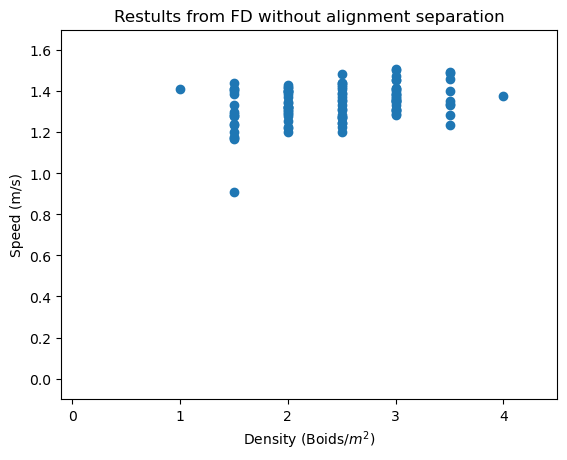

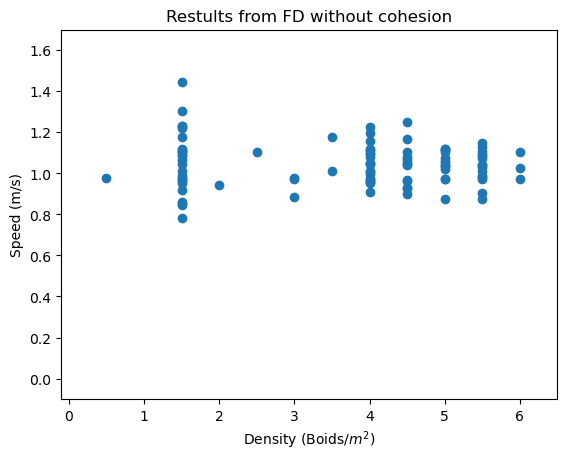

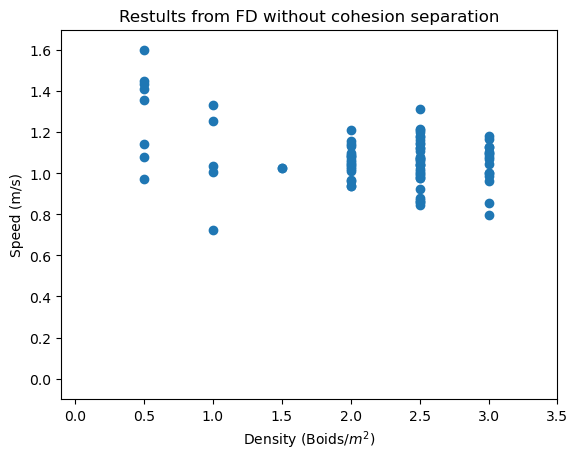

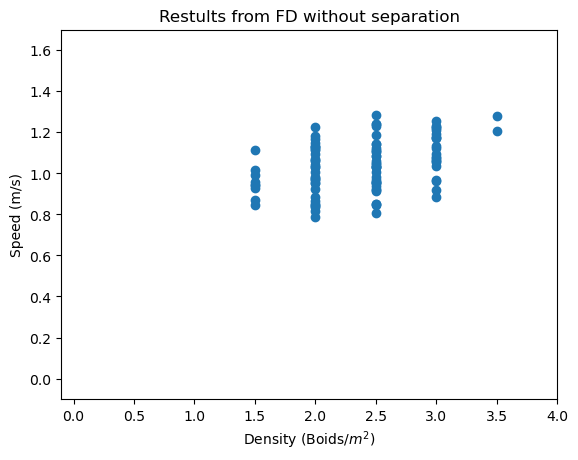

In [154]:
path = './Results1000/'

for file in os.listdir(path):
    fn = os.path.join(path, file)
    
    nr_boids = np.loadtxt(fn, dtype=int, usecols=0, delimiter=',')
    
    temp = np.zeros((len(nr_boids), max(nr_boids)))
    
    with open(fn, 'r') as txt:
        for i, line in enumerate(txt):
            index = line.find(',')
            line = line[index+1:]

            temp[i] = padder(np.fromstring(line, dtype=float, sep=','), max(nr_boids))
    
    densities = density(nr_boids)
    speeds = []
    
    for row in range(temp.shape[0]):
#         print("temp:", temp[row])
#         print(nr_boids[row], ":", temp[row, :nr_boids[row]], "\n")
        speeds.append(average(nr_boids[row], temp[row, :nr_boids[row]]))
    
    # Data cleaning (removing invalid trials):
    indices = []
    for i in range(temp.shape[0]):
        if (densities[i] and speeds[i]) == 0:
            indices.append(i)
    
    densities = np.delete(densities, indices, axis=0)
    speeds = np.delete(speeds, indices, axis=0)
            
    scatter(densities, speeds, file.rstrip('.txt'))
